# Machine Learning - Group Project
**Group Members**:
- 
- 
-
-
-
-Canhoto, Vera (m20210659@novaims.unl.pt)

In [3]:
# Jupyter notebook display size adjustment
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<a class="anchor" id="0.1"></a>

# **Table of Contents**

1. [Business Understanding](#1)
   - 1.1 [Business Objectives](#1.1)
   - 1.2 [Programming Languages and Libraries](#1.2)
   - 1.3 [Project Plan](#1.3)


2. [Data Understanding](#2)
   - 2.1 [Initial Data Collection](#2.1)
   - 2.2 [Data Description](#2.2)
   - 2.3 [Data Exploration](#2.3)
   -2.3.1 [Data Visual exploration](#2.3.1)
   - 2.4 [Data Quality Verification](#2.4)
   -2.4.1 [Coherence check ](#2.4.1)
   -2.4.2 [Data editing ](#2.4.2)
   -2.4.2.1 [Fix wrong data types](#2.4.2.1)
   -2.4.2.2 [Ouliers](#2.4.2.2)
   -2.4.3 [Data cleansing](#2.4.3)
   -2.4.4 [Data wrangling](#2.4.4)
   -2.4.5 [Data reduction](#2.4.5)
   -2.4.6 [Redo data exploration](#2.4.6)
   - 2.5 [Definition of the initial Metric and Non-metric Features](#2.5)
  
  
3. [Feature Selection](#3)

4. [Final Selected features](#4)


5. [Re-Sampling Techniques for Imbalanced Classification](#5)
   
   
6. [Modeling](#6)
 
   
7. [Models Comparisson](#7)
 
 
8. [Final Model - Kaggle Submission](#8)

# 1. Business Understanding <a class="anchor" id="1"></a>

## 1.1 Business Objective <a class="anchor" id="1.1"></a>

To 

## 1.2 Programming Languages and Libraries <a class="anchor" id="1.1"></a>

**Programming Language:** Python

**Available / utilized libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

from datetime import datetime
#from sklearn.model_selection import train_test_split

from math import ceil

from itertools import product
from pandas_profiling import ProfileReport

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Seeting seaborn style
sns.set()


# Data Exploration
#from pandas_profiling import ProfileReport



#Clustering
#from kmodes.kprototypes import KPrototypes
#hierarchical clustering
#from sklearn.cluster import AgglomerativeClustering, KMeans
#from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

# Missing Values imputation
#from sklearn.impute import KNNImputer
#from sklearn.preprocessing import OrdinalEncoder

#outliers
#from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor


# Visualization
#import matplotlib
#matplotlib.use('TkAgg', force=True)
#import matplotlib.pyplot as plt
#import seaborn as sns
# Import TSNE
#from sklearn.manifold import TSNE



#import warnings
#warnings.filterwarnings('ignore')

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\Users\verac\anacondaJuno\envs\Programing_DS\lib\site-packages\pandas\core\dtypes\generic.py)

## 1.3 Project Plan  <a class="anchor" id="1.4"></a>

# 2. Data Understanding <a class="anchor" id="2"></a>

## 2.1 Initial Data Collection <a class="anchor" id="2.1"></a>

We have only one source of data hence assessment of potential quality problem from data merge is not applicable

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_buy = train['Buy']
train.drop(columns=['Buy'])

#identify data as being test or train so that we can separate them later on
train["Split"] = "train"
test["Split"] = "test"

#merge both data sets to facilitate the exploration and cleaning of the data

frames = [train, test]

data = pd.concat(frames)


In [6]:
data.head()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  102863333  21-Mar-20                 0                  0.0          0   
1  103117814  20-May-20                 0                  0.0          0   
2  103201891   4-Dec-20                 0                  0.0          0   
3  103226087  22-Dec-20                 0                  0.0          0   
4  103234445  24-Nov-20                 0                  0.0          2   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0              3           64.0000                      0.0000   
1           0.0             23          684.5000                      0.0217   
2           0.0              8           95.0000                      0.0250   
3           0.0              9          608.7500                      0.0000   
4         386.0             36         1609.9397                      0.0000   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0667                     0.0000   MacOSX        2   
1                    0.0449                     0.0000  Windows        2   
2                    0.0583                     0.0000  Windows        4   
3                    0.0250                    42.4225  Windows        2   
4                    0.0093                    12.5033  Windows        2   

          Country  Type_of_Traffic Type_of_Visitor  Buy  Split  
0        Portugal                1        Returner  0.0  train  
1          France                6        Returner  0.0  train  
2           Italy                1        Returner  0.0  train  
3  United Kingdom                2        Returner  1.0  train  
4           Spain                3        Returner  1.0  train

In [7]:
data.tail()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
2295  962042726  27-Nov-20                10                720.5          2   
2296  962063064  20-Mar-20                 0                  0.0          0   
2297  962147749  22-Nov-20                 2                 45.5          0   
2298  962182167  19-Nov-20                 8                166.7          0   
2299  962218682  18-May-20                 1                107.0          0   

      FAQ_Duration  Product_Pages  Product_Duration  \
2295        88.725            220        10580.3448   
2296         0.000              3           55.0000   
2297         0.000             22          535.0000   
2298         0.000              9          171.7000   
2299         0.000             27          839.6667   

      GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
2295                      0.0048                    0.0221   
2296                      0.0667                    0.1000   
2297                      0.0000                    0.0250   
2298                      0.0167                    0.0500   
2299                      0.0214                    0.0367   

      GoogleAnalytics_PageValue       OS  Browser   Country  Type_of_Traffic  \
2295                     0.0000  Windows        2  Portugal                1   
2296                     0.0000   MacOSX        2     Spain                3   
2297                     9.6503  Windows        2     Spain               11   
2298                     0.0000  Windows        2  Portugal                3   
2299                     0.0000   MacOSX        2     Spain               13   

     Type_of_Visitor  Buy Split  
2295        Returner  NaN  test  
2296        Returner  NaN  test  
2297        Returner  NaN  test  
2298        Returner  NaN  test  
2299        Returner  NaN  test

## 2.2 Data Description  <a class="anchor" id="2.2"></a>
Based on the metadata provided:

### Metadata
Access_ID - Unique identification of the user access to the website<br>
Date - Website visit date<br>
AccountMng_Pages - Number of pages visited by the user about account management<br>
AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages<br>
FAQ_Pages - Number of pages visited by the user about frequently asked questions, shipping information and company related pages<br>
FAQ_Duration - Total amount of time (seconds) spent by the user on FAQ pages<br>
Product_Pages - Number of pages visited by the user about products and services offered by the company<br>
Product_Duration - Total amount in time (seconds) spent by the user on products and services related pages<br>
GoogleAnalytics_BounceRate - Average bounce rate value of the pages visited by the user, provided by google analytics<br>
GoogleAnalytics_ExitRate - Average exit rate value of the pages visited by the user, provided by google analytics<br>
GoogleAnalytics_PageValue - Average page value of the pages visited by the user, provided by google analytics<br>
OS - Operating System of the user<br>
Browser - Browser used to access the webpage<br>
Country - The country of the user<br>
Type_of_Traffic - Traffic Source by which the user has accessed the website (e.g., email, banner, direct)<br>
Type_of_Visitor - User type as "New access", "Returner" or "Other"<br>
Buy - Class label indicating if the user finalized their actions in the website with a transaction<br>

## 2.3 Data Exploration  <a class="anchor" id="2.3"></a>

In [8]:
# Check default import data types of the features
# There are no nan values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12299 entries, 0 to 2299
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   12299 non-null  int64  
 1   Date                        12299 non-null  object 
 2   AccountMng_Pages            12299 non-null  int64  
 3   AccountMng_Duration         12299 non-null  float64
 4   FAQ_Pages                   12299 non-null  int64  
 5   FAQ_Duration                12299 non-null  float64
 6   Product_Pages               12299 non-null  int64  
 7   Product_Duration            12299 non-null  float64
 8   GoogleAnalytics_BounceRate  12299 non-null  float64
 9   GoogleAnalytics_ExitRate    12299 non-null  float64
 10  GoogleAnalytics_PageValue   12299 non-null  float64
 11  OS                          12299 non-null  object 
 12  Browser                     12299 non-null  int64  
 13  Country                     1229

In [9]:
test.head()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  798519314  24-Aug-20                 0                 0.00          0   
1  798663101  25-May-20                 2                37.50          0   
2  798663221   2-Nov-20                 0                 0.00          0   
3  798760918  14-May-20                 0                 0.00          0   
4  798856982   5-Nov-20                12               225.25          1   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0             86         5332.5478                      0.0139   
1           0.0             55         1420.4725                      0.0012   
2           0.0             36          788.5000                      0.0000   
3           0.0              2          689.0000                      0.0000   
4           0.0            129         3367.0413                      0.0014   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0654                     0.0000  Windows        2   
1                    0.0058                     0.0000  Android        1   
2                    0.0250                     0.0000  Windows        6   
3                    0.1000                     0.0000  Windows        2   
4                    0.0185                     1.0353  Windows        4   

    Country  Type_of_Traffic Type_of_Visitor Split  
0    Brazil                1        Returner  test  
1     Spain                4        Returner  test  
2     Spain                3        Returner  test  
3     Spain                2      New_Access  test  
4  Portugal               10        Returner  test

In [10]:
data.describe()

Access_ID  AccountMng_Pages  AccountMng_Duration     FAQ_Pages  \
count  1.229900e+04      12299.000000         12299.000000  12299.000000   
mean   5.321063e+08          2.317831            80.939384      0.504025   
std    2.483320e+08          3.324224           176.954932      1.271059   
min    1.028633e+08          0.000000             0.000000      0.000000   
25%    3.135932e+08          0.000000             0.000000      0.000000   
50%    5.341762e+08          1.000000             8.000000      0.000000   
75%    7.491653e+08          4.000000            93.500000      0.000000   
max    9.622187e+08         27.000000          3398.750000     24.000000   

       FAQ_Duration  Product_Pages  Product_Duration  \
count  12299.000000   12299.000000      12299.000000   
mean      34.504445      31.731279       1194.583691   
std      140.875199      44.474051       1913.049335   
min        0.000000       0.000000          0.000000   
25%        0.000000       7.000000        183.937500   
50%        0.000000      18.000000        598.873800   
75%        0.000000      38.000000       1465.821900   
max     2549.375000     705.000000      63973.522200   

       GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
count                12299.000000              12299.000000   
mean                     0.022193                  0.043066   
std                      0.048486                  0.048602   
min                      0.000000                  0.000000   
25%                      0.000000                  0.014300   
50%                      0.003100                  0.025100   
75%                      0.016800                  0.050000   
max                      0.200000                  0.200000   

       GoogleAnalytics_PageValue       Browser  Type_of_Traffic          Buy  
count               12299.000000  12299.000000     12299.000000  9999.000000  
mean                    5.893057      2.355070         3.967802     0.155216  
std                    18.575604      1.712942         3.681666     0.362128  
min                     0.000000      1.000000         1.000000     0.000000  
25%                     0.000000      2.000000         2.000000     0.000000  
50%                     0.000000      2.000000         2.000000     0.000000  
75%                     0.000000      2.000000         4.000000     0.000000  
max                   361.763700     13.000000        15.000000     1.000000

In [11]:
data.describe(include="all").T

count unique       top   freq              mean  \
Access_ID                   12299.0    NaN       NaN    NaN  532106260.086105   
Date                          12299    305  5-May-20    146               NaN   
AccountMng_Pages            12299.0    NaN       NaN    NaN          2.317831   
AccountMng_Duration         12299.0    NaN       NaN    NaN         80.939384   
FAQ_Pages                   12299.0    NaN       NaN    NaN          0.504025   
FAQ_Duration                12299.0    NaN       NaN    NaN         34.504445   
Product_Pages               12299.0    NaN       NaN    NaN         31.731279   
Product_Duration            12299.0    NaN       NaN    NaN       1194.583691   
GoogleAnalytics_BounceRate  12299.0    NaN       NaN    NaN          0.022193   
GoogleAnalytics_ExitRate    12299.0    NaN       NaN    NaN          0.043066   
GoogleAnalytics_PageValue   12299.0    NaN       NaN    NaN          5.893057   
OS                            12299      8   Windows   6585               NaN   
Browser                     12299.0    NaN       NaN    NaN           2.35507   
Country                       12299      9  Portugal   4765               NaN   
Type_of_Traffic             12299.0    NaN       NaN    NaN          3.967802   
Type_of_Visitor               12299      3  Returner  10522               NaN   
Buy                          9999.0    NaN       NaN    NaN          0.155216   
Split                         12299      2     train   9999               NaN   

                                         std          min          25%  \
Access_ID                   248331987.130444  102863333.0  313593213.5   
Date                                     NaN          NaN          NaN   
AccountMng_Pages                    3.324224          0.0          0.0   
AccountMng_Duration               176.954932          0.0          0.0   
FAQ_Pages                           1.271059          0.0          0.0   
FAQ_Duration                      140.875199          0.0          0.0   
Product_Pages                      44.474051          0.0          7.0   
Product_Duration                 1913.049335          0.0     183.9375   
GoogleAnalytics_BounceRate          0.048486          0.0          0.0   
GoogleAnalytics_ExitRate            0.048602          0.0       0.0143   
GoogleAnalytics_PageValue          18.575604          0.0          0.0   
OS                                       NaN          NaN          NaN   
Browser                             1.712942          1.0          2.0   
Country                                  NaN          NaN          NaN   
Type_of_Traffic                     3.681666          1.0          2.0   
Type_of_Visitor                          NaN          NaN          NaN   
Buy                                 0.362128          0.0          0.0   
Split                                    NaN          NaN          NaN   

                                    50%          75%          max  
Access_ID                   534176203.0  749165323.5  962218682.0  
Date                                NaN          NaN          NaN  
AccountMng_Pages                    1.0          4.0         27.0  
AccountMng_Duration                 8.0         93.5      3398.75  
FAQ_Pages                           0.0          0.0         24.0  
FAQ_Duration                        0.0          0.0     2549.375  
Product_Pages                      18.0         38.0        705.0  
Product_Duration               598.8738    1465.8219   63973.5222  
GoogleAnalytics_BounceRate       0.0031       0.0168          0.2  
GoogleAnalytics_ExitRate         0.0251         0.05          0.2  
GoogleAnalytics_PageValue           0.0          0.0     361.7637  
OS                                  NaN          NaN          NaN  
Browser                             2.0          2.0         13.0  
Country                             NaN          NaN          NaN  
Type_of_Traffic                     2.0          4.0         15

In [12]:
# Check the number of entries, also to check if the merge was made correctly
data.shape

(12299, 18)

In [13]:
test.shape

(2300, 17)

In [92]:
train.shape

(9999, 18)

In [14]:
# Check for duplicates
data.duplicated().sum()

0

In [15]:
# Check for duplicates Access_ID
data.duplicated(subset='Access_ID').sum()

0

## 2.3.1 Data Visual exploration   <a class="anchor" id="3.1"></a>

In [16]:
#Define metric and non-metric features
non_metric_features = ["OS", "Country","Date", "Type_of_Visitor", "Browser", "Type_of_Traffic"]
metric_features = train.columns.drop(non_metric_features).to_list()

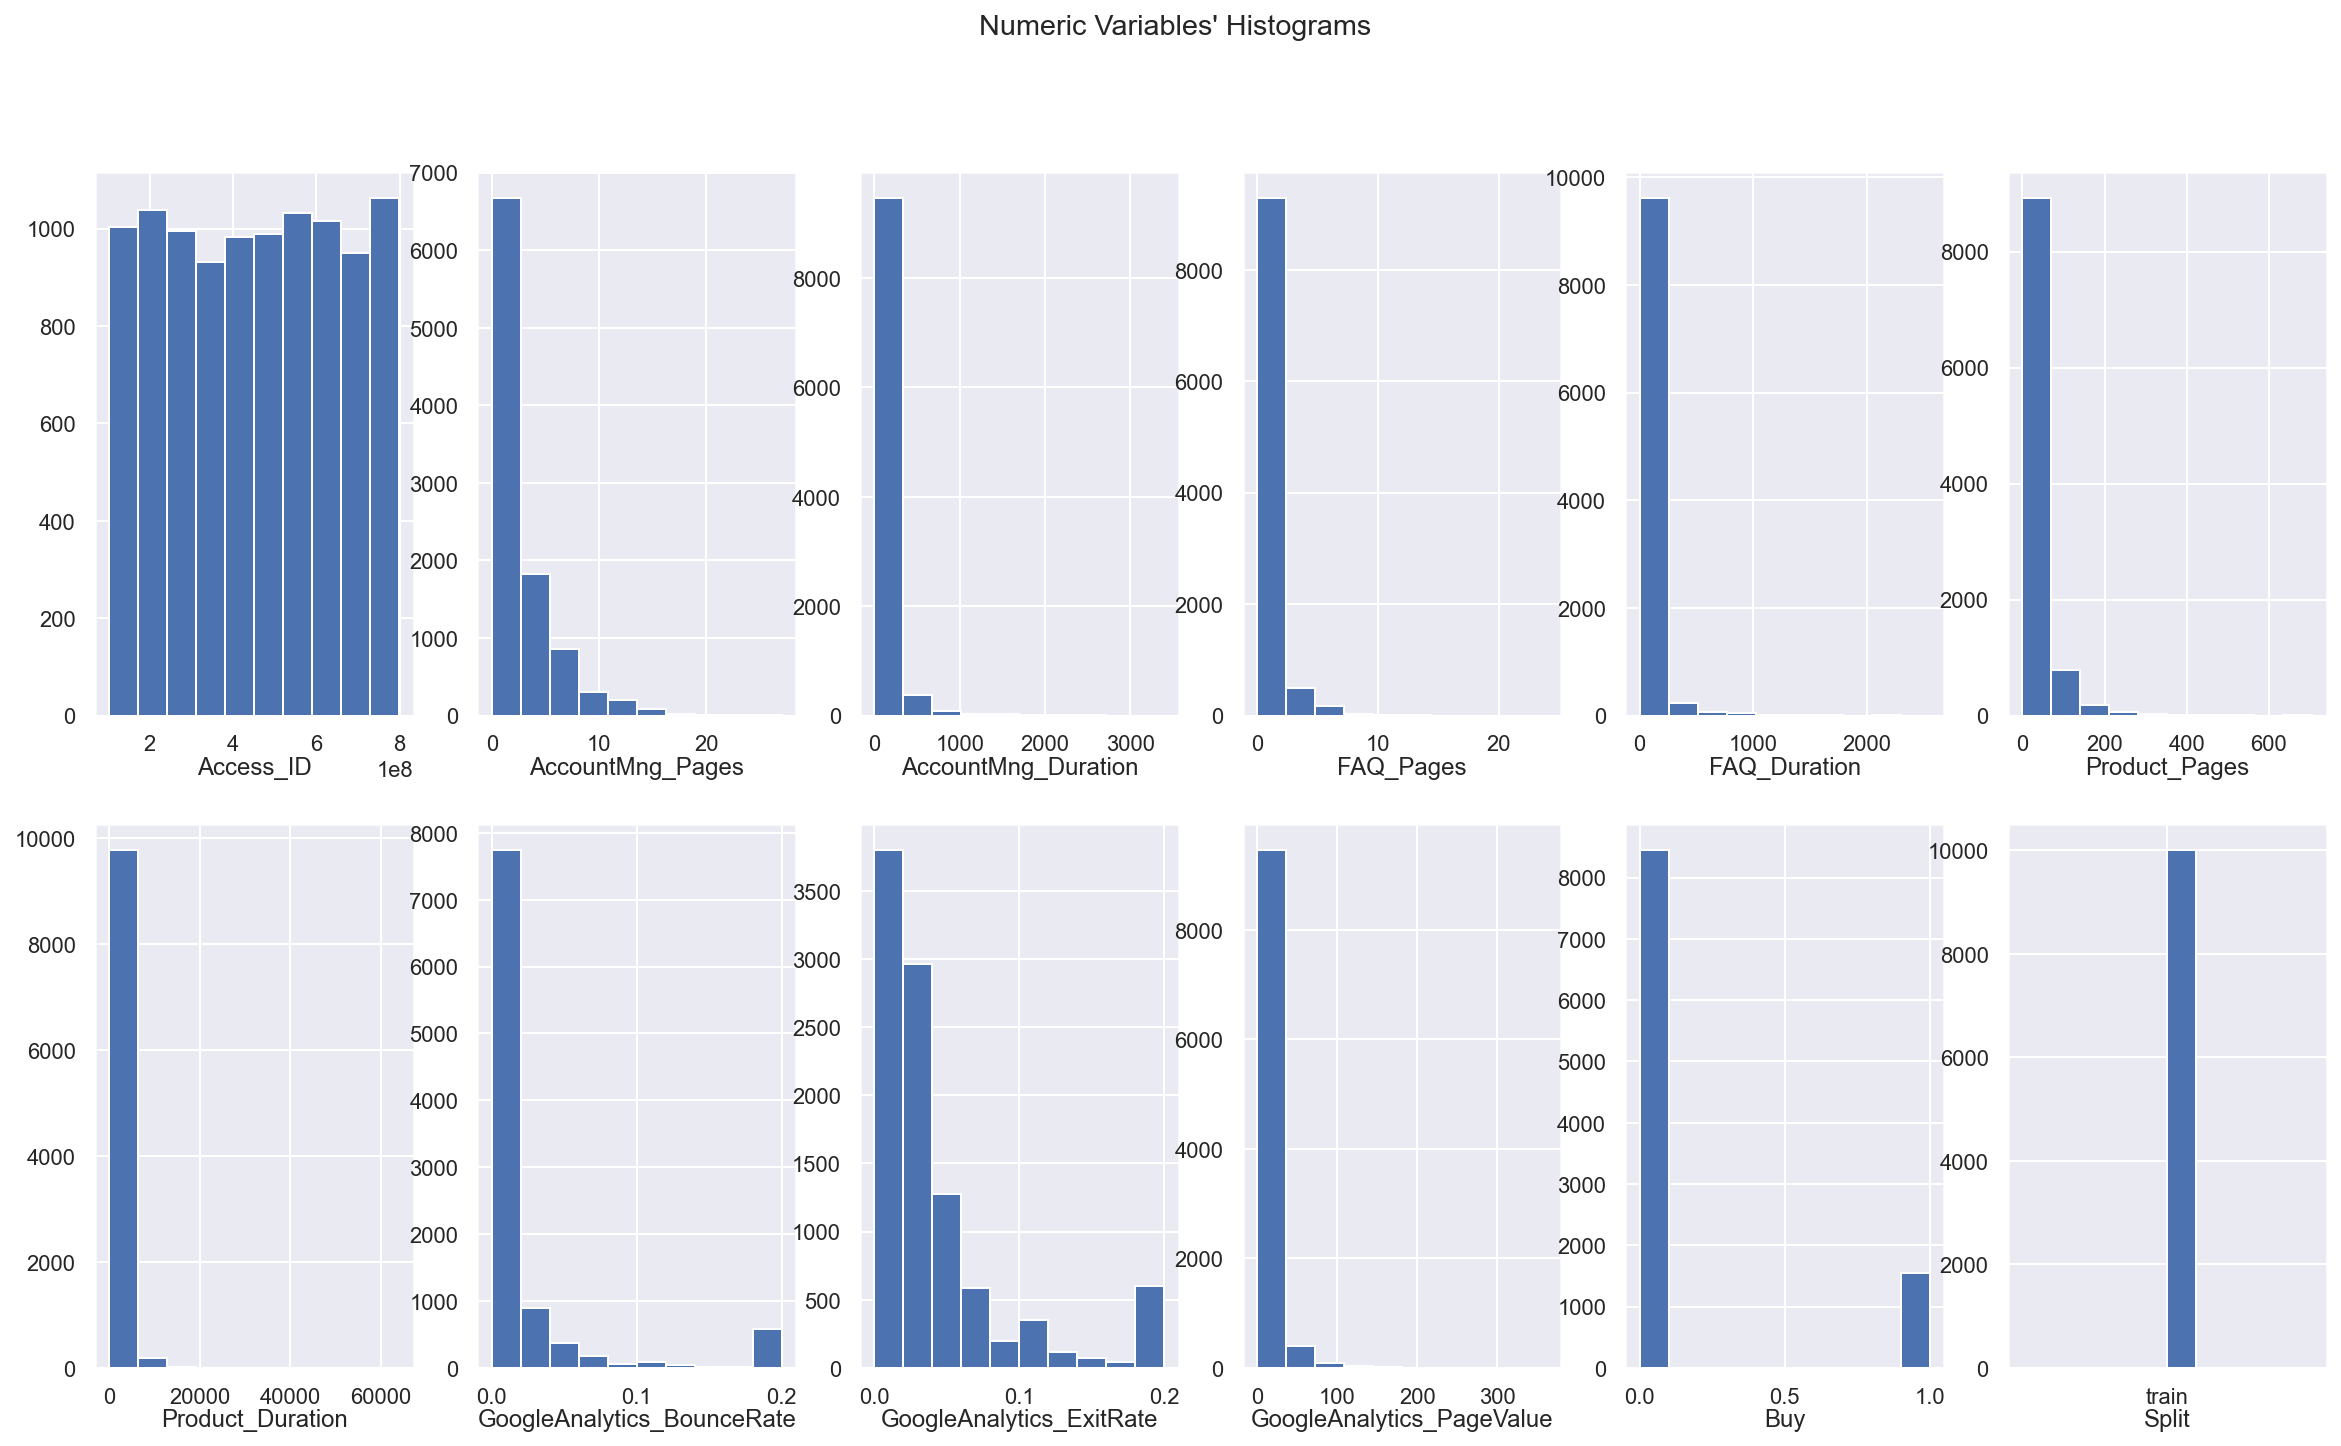

In [17]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

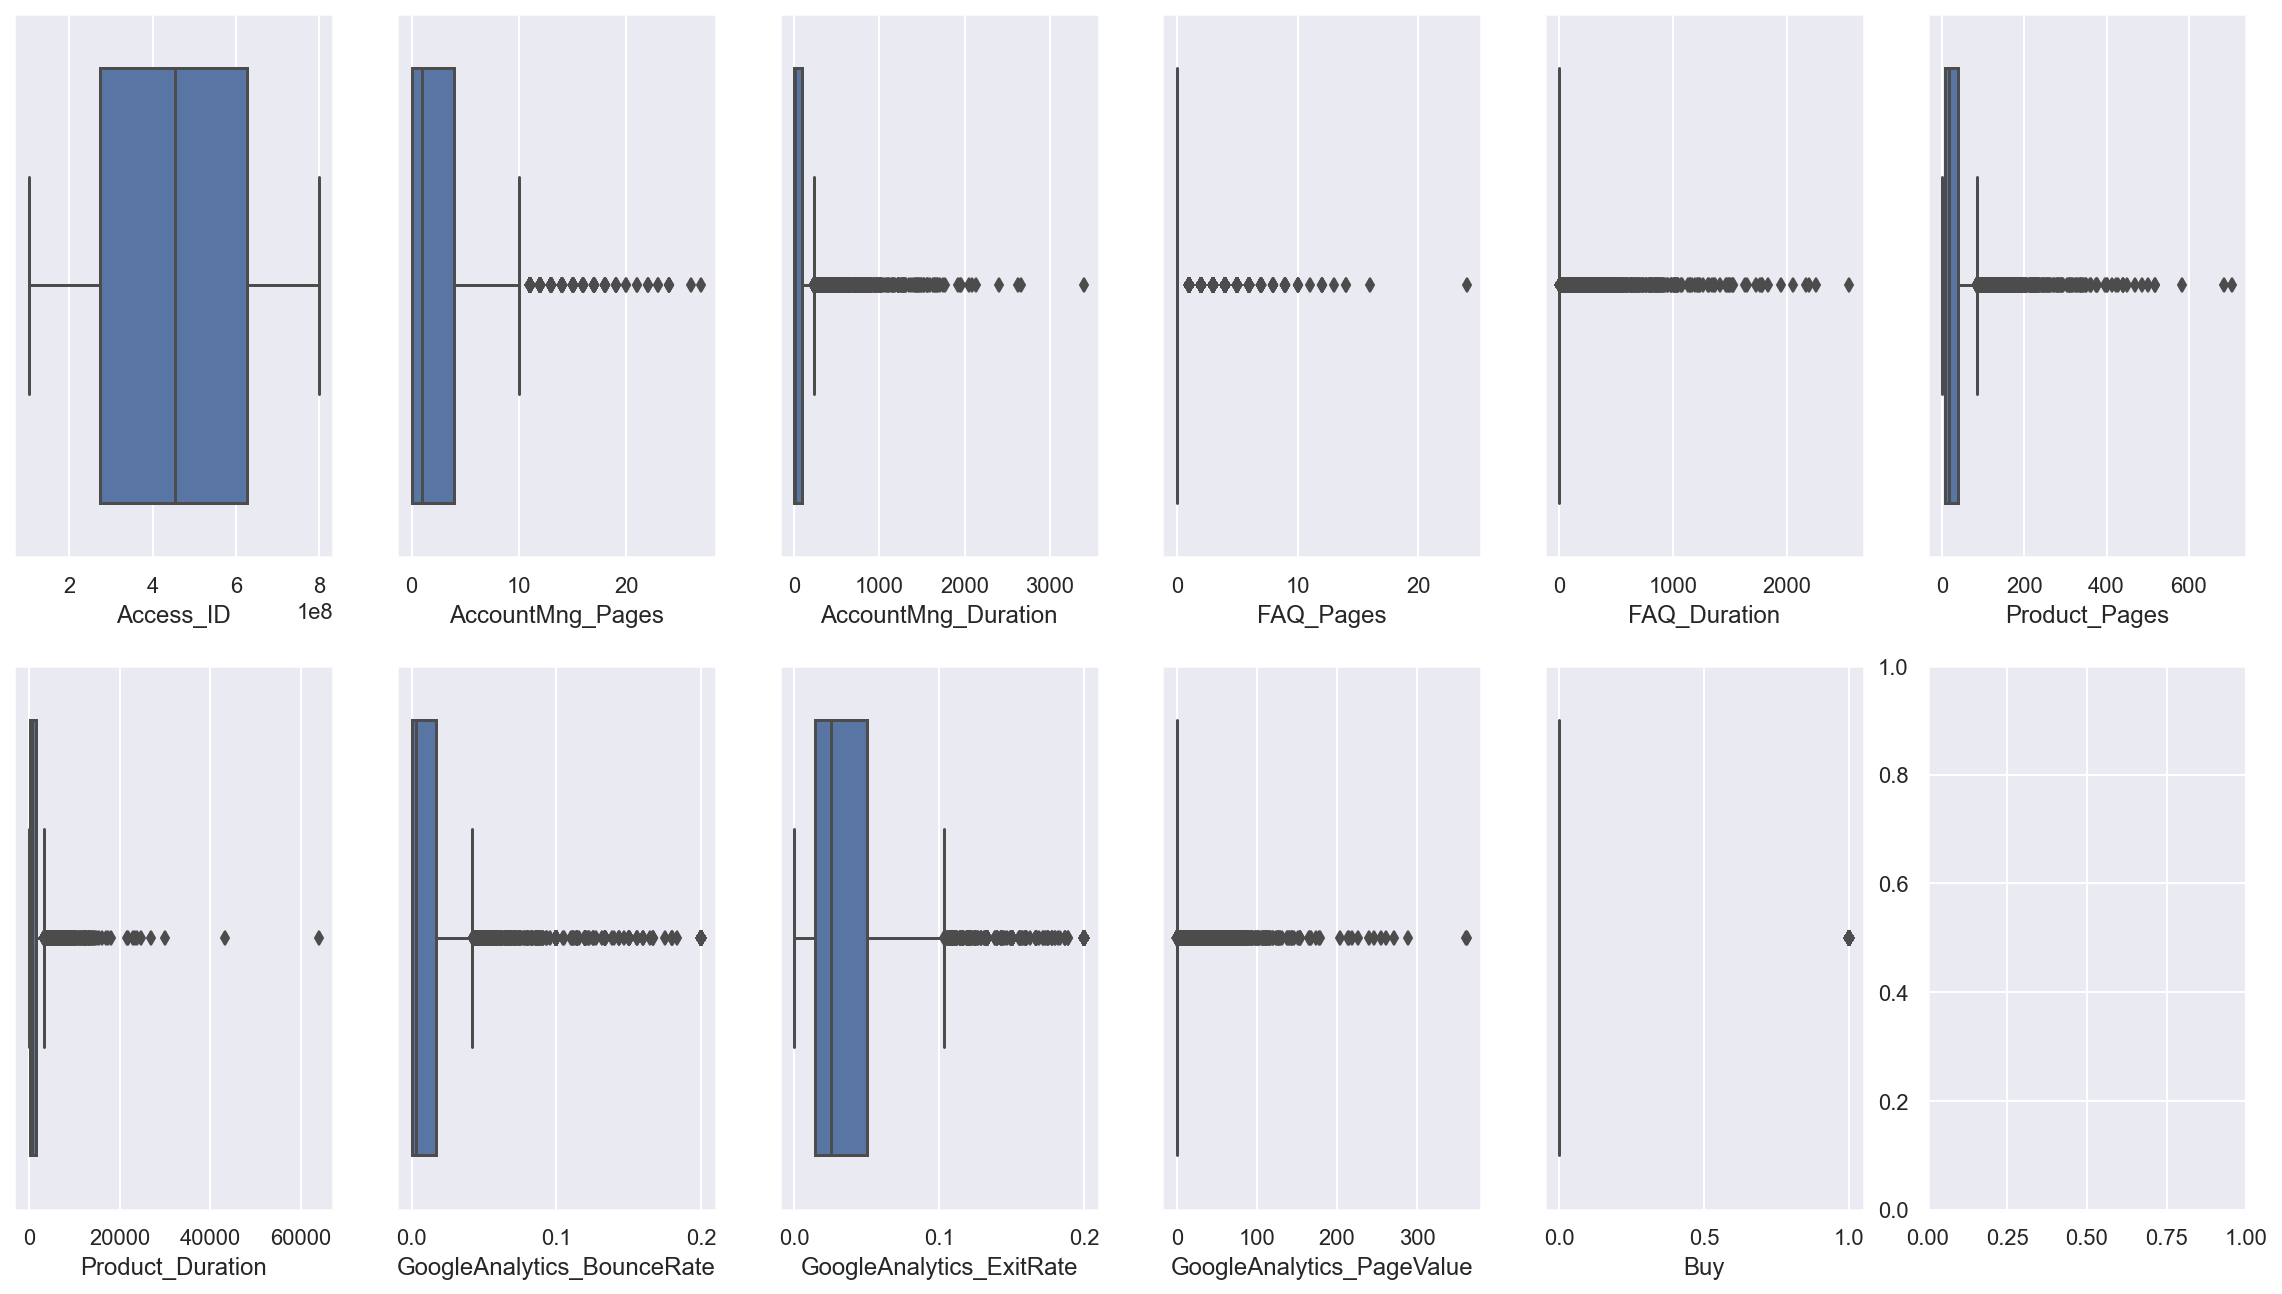

In [18]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

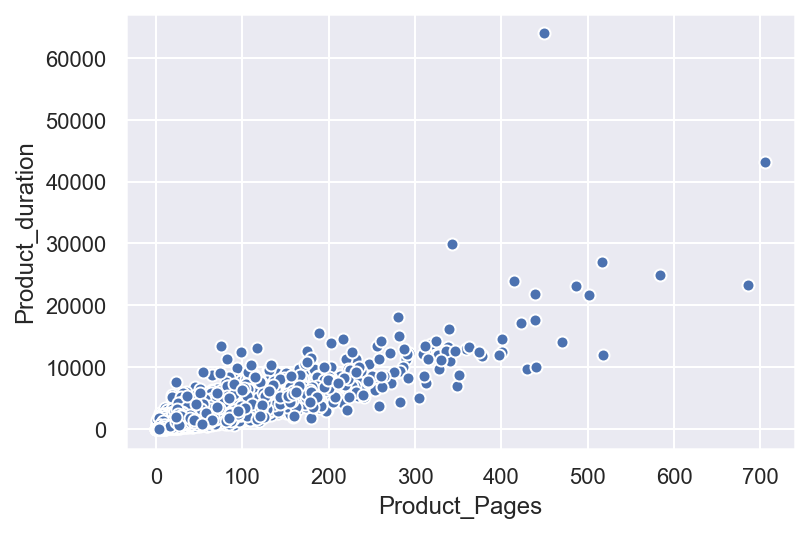

In [98]:
# Pairwise Relationship of Numerical Variables
# Single Metric Variable Scatter plot
plt.scatter(train["Product_Pages"], train["Product_Duration"], edgecolors="white")
plt.xlabel("Product_Pages")
plt.ylabel("Product_duration")

plt.show()

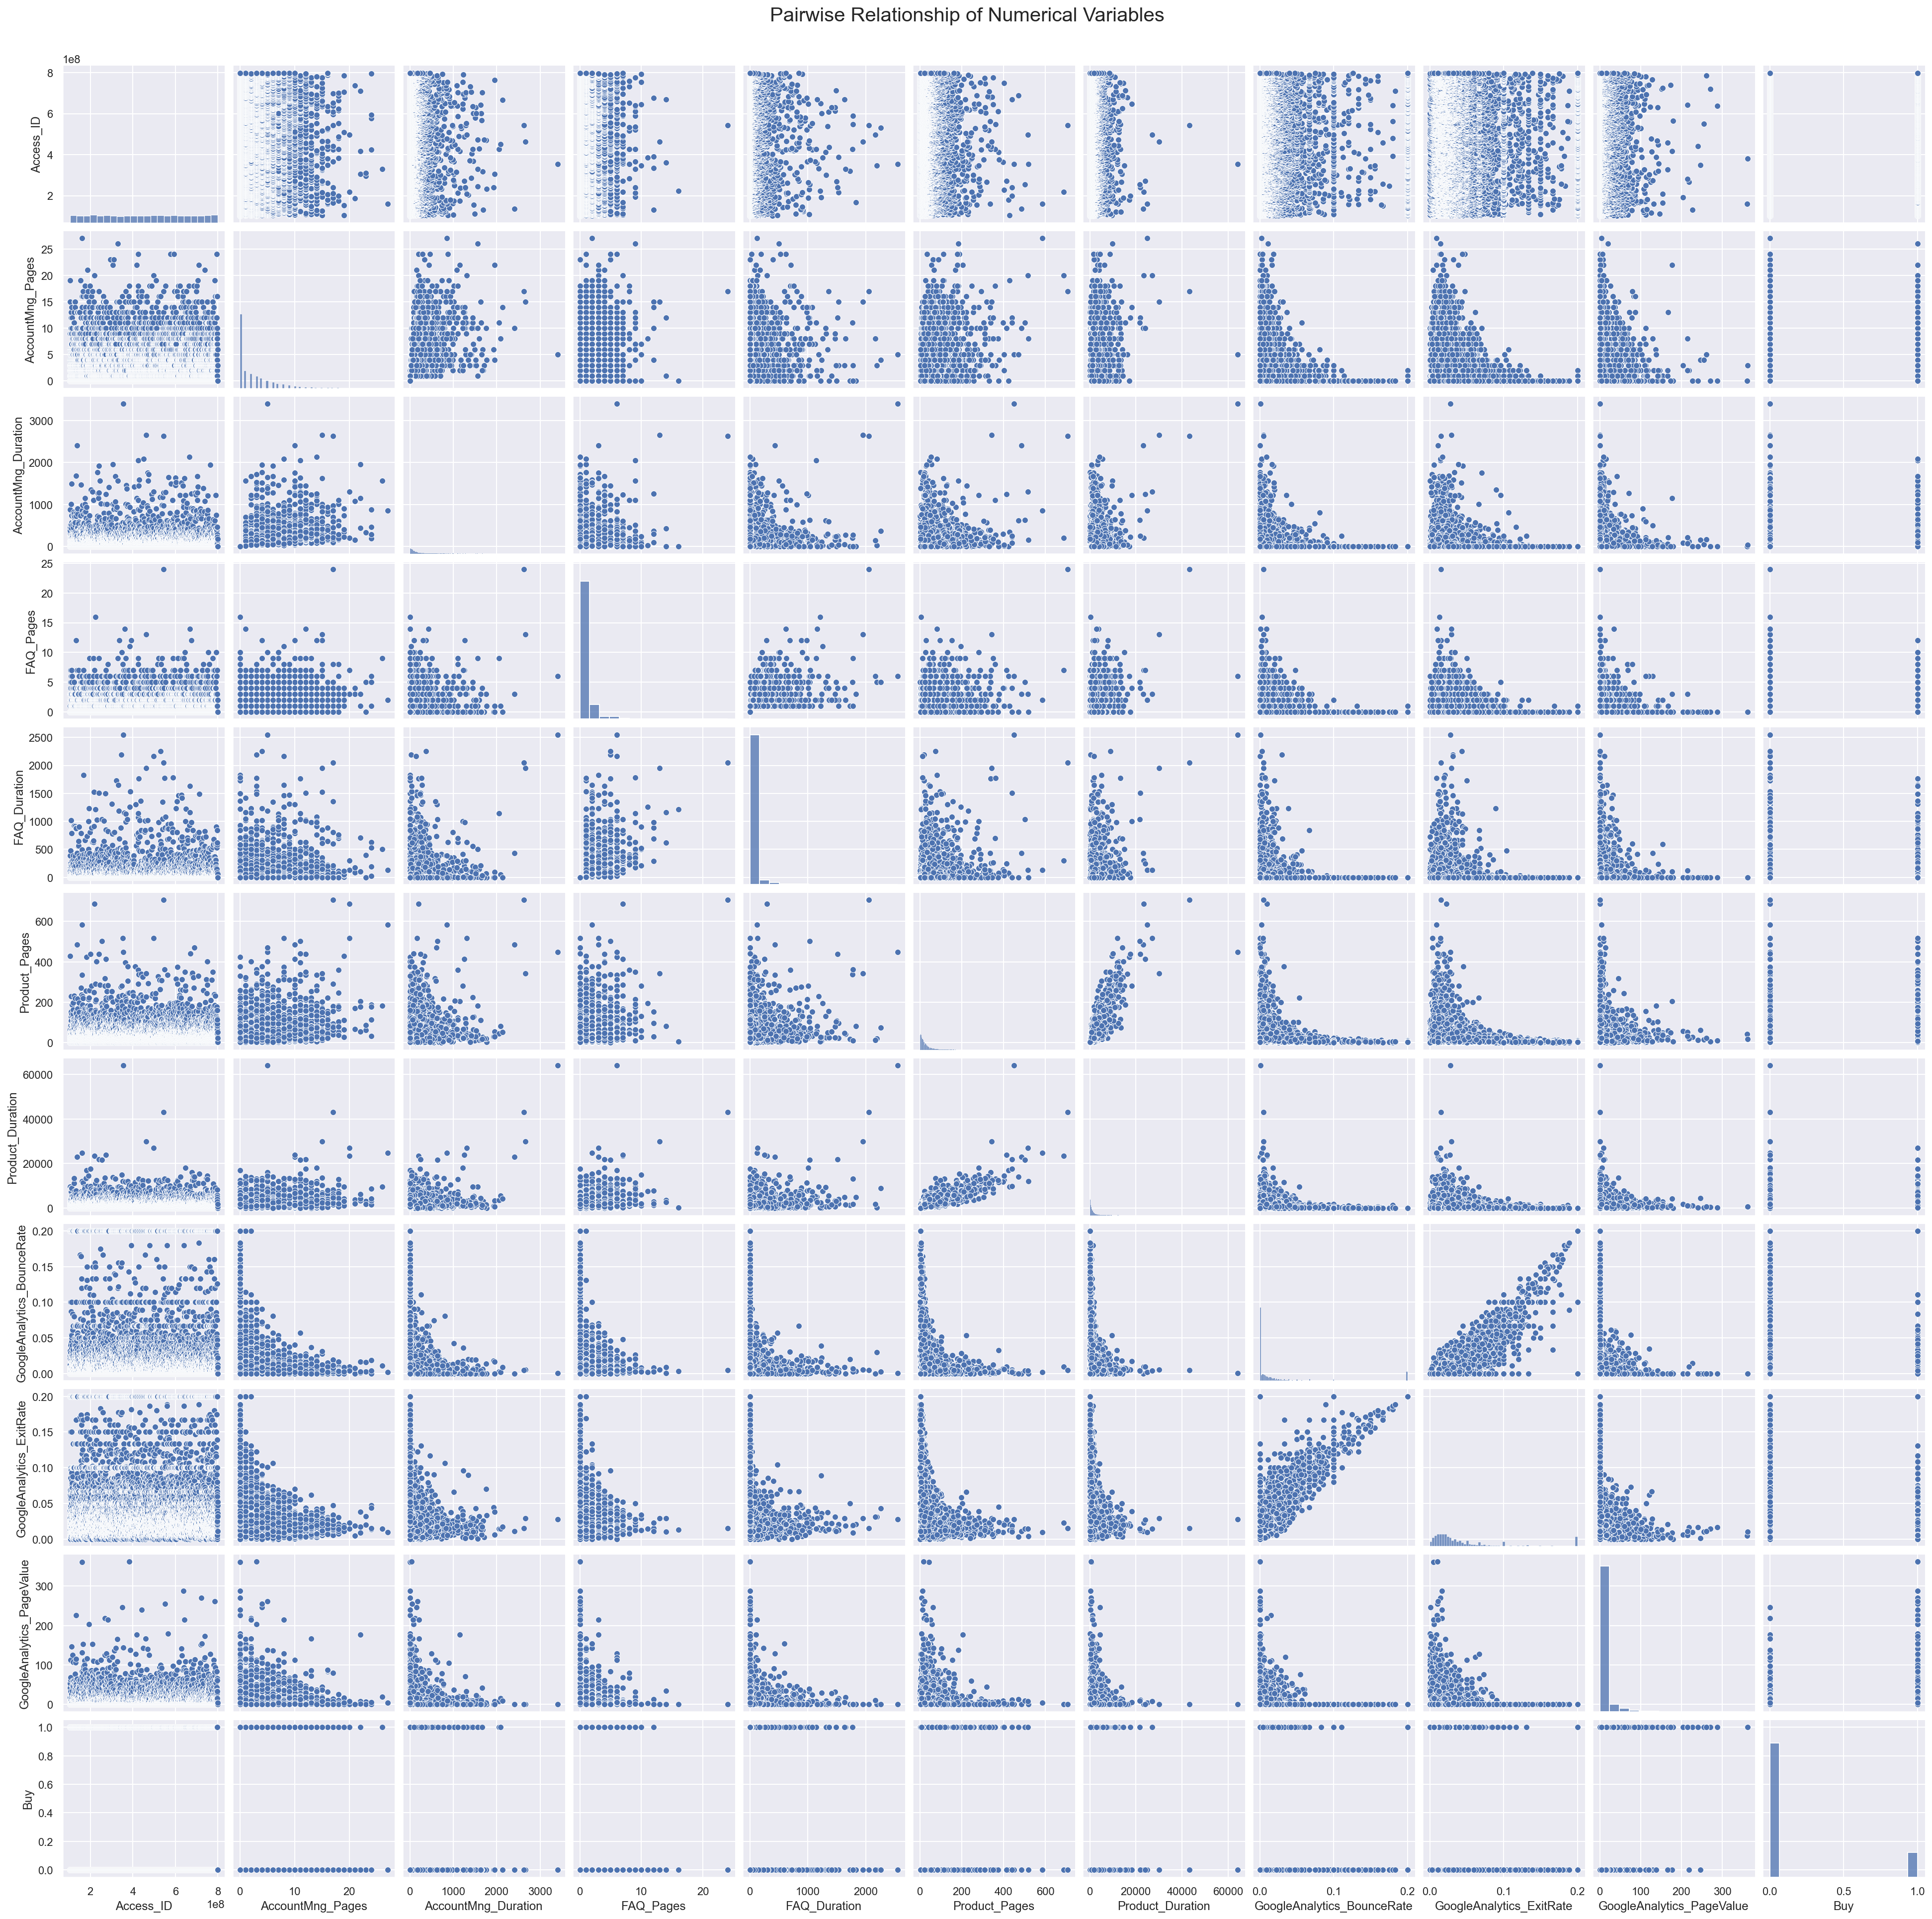

In [99]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

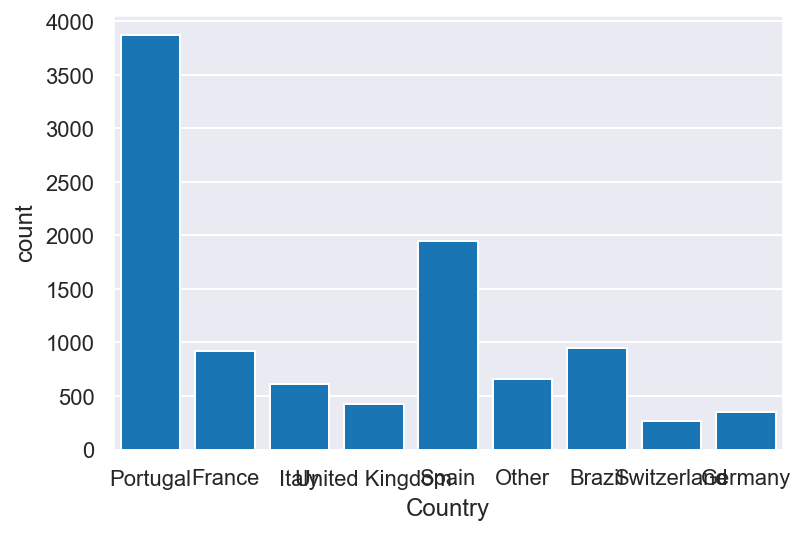

In [100]:
# Single Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
sns.countplot(x=train["Country"],color='#007acc')

plt.show()

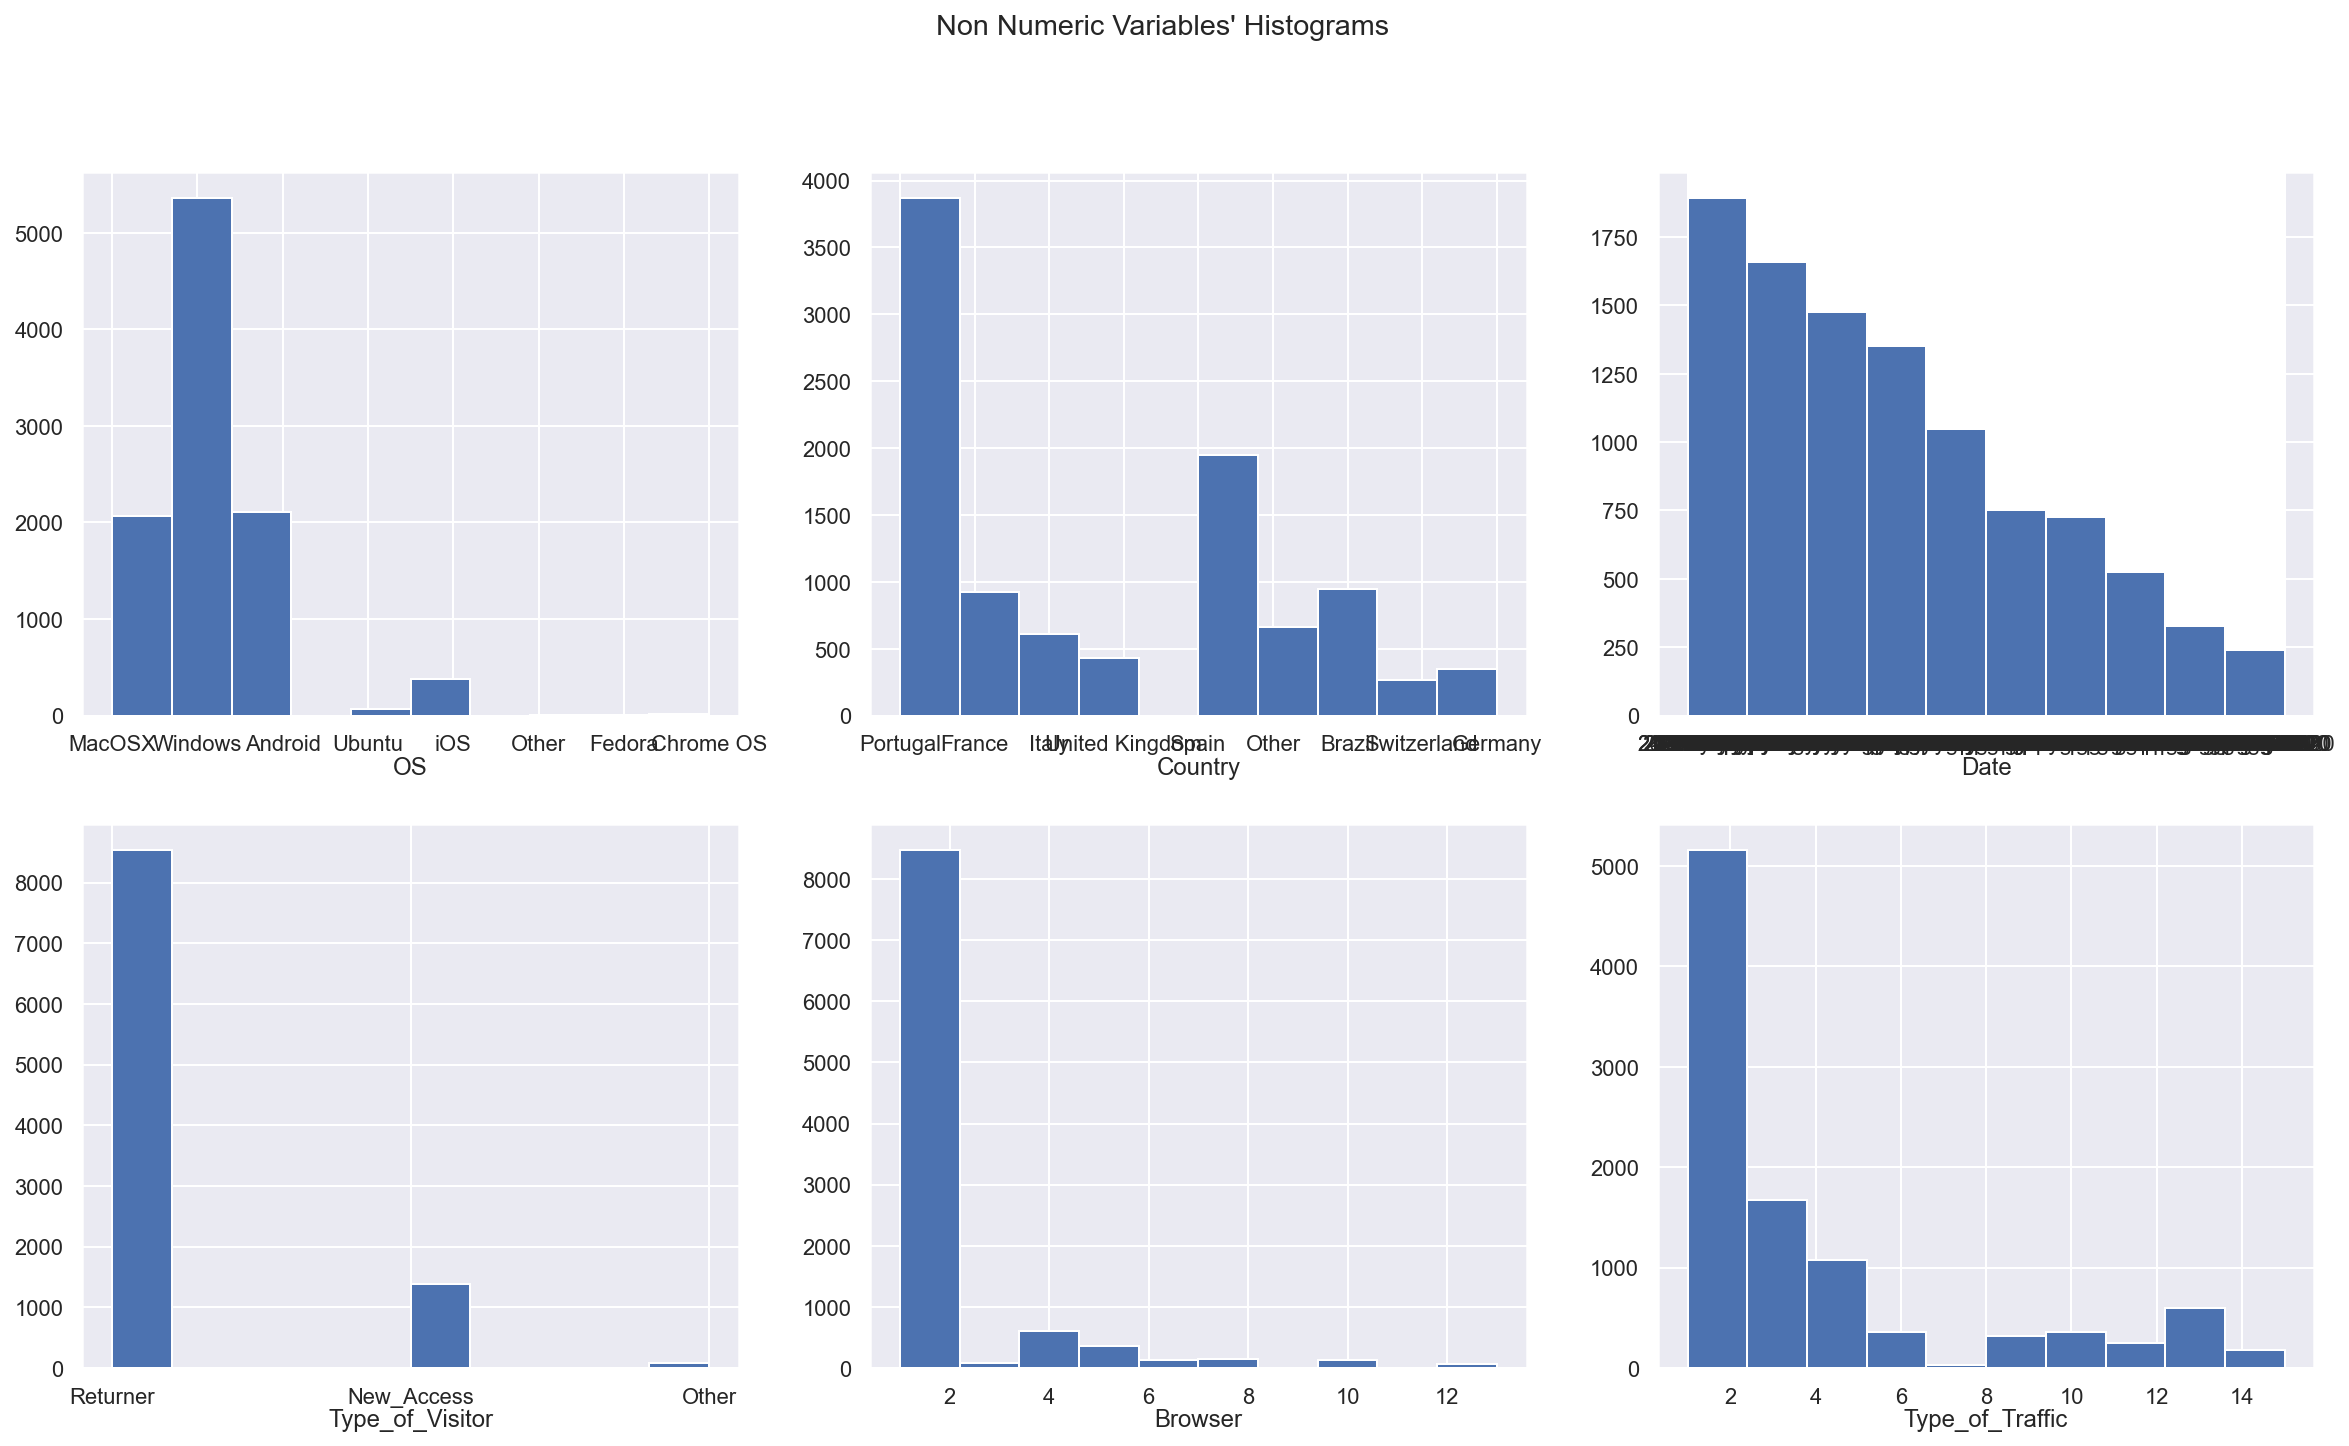

In [101]:
# All Non Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Non Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

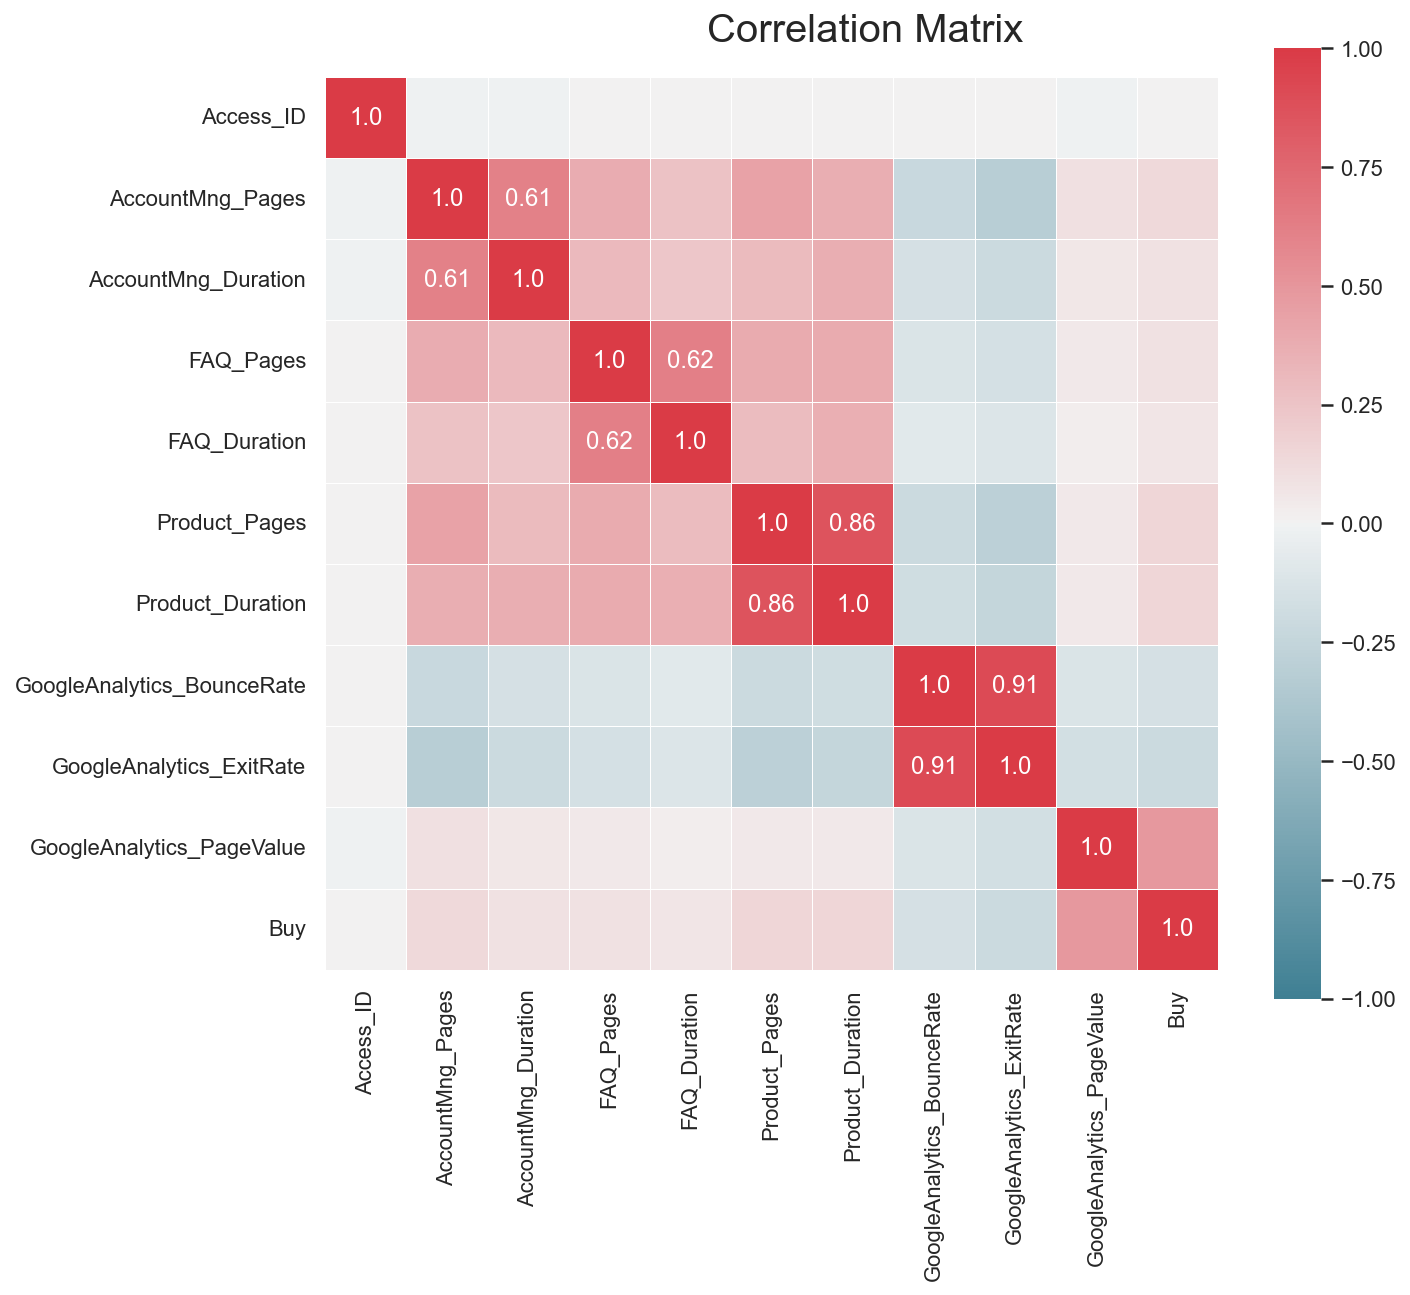

In [102]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(train[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

## 2.4 Data Quality Verification  <a class="anchor" id="2.4"></a>

## 2.4.1 Coherence check   <a class="anchor" id="3.1"></a>
(find inconsistent values, missing values, outliers and any other problem you may find in your dataset)


A initial Data Exploration shows that:<br>

-There are no missing values;<br>
-There are no duplicated values;<br>
-There are no inconsistent values;<br>
-Some data types should be altered:
  - Type_of_Traffic should be an object 
  - Browser should be an object
  - Date should be a datetime object
  
-There is the possibility of ouliers, we must check and remove them through:
  - Manual visual inspection
  - IQR

## 2.4.2 Data editing   <a class="anchor" id="3.1"></a>
(fix inconsistent values)

### 2.4.2.1 Fix wrong data types  <a class="anchor" id="3.1"></a>

In [103]:
#Changing data types
data['Date'] = pd.to_datetime(data['Date'])
data['Type_of_Traffic']=  data['Type_of_Traffic'].astype(str)
data['Browser']=  data['Browser'].astype(str)

data.dtypes

Access_ID                              int64
Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                               object
Country                               object
Type_of_Traffic                       object
Type_of_Visitor                       object
Buy                                  float64
Split                                 object
dtype: object

### 2.4.2.2 Ouliers  <a class="anchor" id="3.1"></a>

In [104]:
#CHECK LAB 7 AND 8 FOR THE FOLLLOWING STEPS

###  2.4.2.2.1 Manual Inspection  <a class="anchor" id="3.1"></a>

In [105]:
#removing outliers using manual way 
filters = (
    (data['AccountMng_Pages']<=17)
    &
    (data['AccountMng_Duration']<=1000)
    &
    (data['FAQ_Pages']<=8)
    &
    (data['FAQ_Duration']<=1000)
    &
    (data['Product_Pages']<=300)
    &
    (data['Product_Duration']<=17000)
    &
    (data['GoogleAnalytics_PageValue']<=110)
    
)

data_1 = data[filters]

print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9763


### 2.4.2.2 IQR  <a class="anchor" id="3.1"></a>

In [106]:
#outlier removal using IQR method
q25 = data.quantile(.25)
q75 = data.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(train[metric].between(llim, ulim, inclusive=True))

data_2 = data[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(data_2.shape[0] / data.shape[0], 4))

C:\Users\verac\AppData\Local\Temp/ipykernel_11960/594570437.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters.append(train[metric].between(llim, ulim, inclusive=True))


KeyError: 'Split'

### 2.4.2.2 Z-Score  <a class="anchor" id="3.1"></a>

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


## 2.4.3 Data cleansing  <a class="anchor" id="3.1"></a>
(drop observations - Outlier removal and removal of inconsistent values and/or features)

### 2.4.3.1 Remove Ouliers  <a class="anchor" id="3.1"></a>

## 2.4.4 Data wrangling  <a class="anchor" id="3.1"></a> 
(feature extraction/engineering and transformation)

### 2.4.4.1 One-hot encoding <a class="anchor" id="3.1"></a>

### 2.4.4.2 Standardization <a class="anchor" id="3.1"></a>
 Standard Scaler<br>
 MinMax Scaler

## 2.4.5 Data reduction <a class="anchor" id="3.1"></a>
(reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)


In [77]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [79]:
for var in data[non_metric_features]:
    TestIndependence(data[non_metric_features][var],data['Buy'], var)
    

NameError: name 'stats' is not defined

In [ ]:
non_metric_features.remove('Country')

15.1. Correlation's: Pearson and Spearman
15.2. Recursive Feature Elimination - RFE
15.3. LASSO Regression
15.4. RIDGE Regression
15.5. Chi-Square
15.6. Principal Components Analysis - PCA
15.7. ANOVA F-Values
15.8. Feature Importances - Tree Based Classifiers
15.9. Gini Importance | Entropy Importance
15.10. MAE | MSE | FRIEDMAN Importances
15.11. AdaBoost Feature Importances

### 2.4.5.1 Dimensionality Reduction: PCA <a class="anchor" id="3.1"></a>

Variable selection: Redundancy VS Relevancy look at correlation graphics
    

## 2.4.6 Redo data exploration <a class="anchor" id="3.1"></a>
Check if the data looks the way you expect it to.

Have you missed some outliers?
Are there still missing values?
Is the data normalized?

# 3.Feature Selection  <a class="anchor" id="2"></a>

## 3.1 Correlation's: Pearson and Spearman <a class="anchor" id="3.1"></a>

## 3.2 Recursive Feature Elimination - RFE <a class="anchor" id="3.2"></a>

## 3.3 LASSO Regression <a class="anchor" id="3.3"></a>

## 3.4 RIDGE Regression <a class="anchor" id="3.4"></a>

## 3.5 Chi-Square <a class="anchor" id="3.5"></a>

## 3.6 Principal Components Analysis - PCA <a class="anchor" id="3.6"></a>

## 3.7 ANOVA F-Values <a class="anchor" id="3.7"></a>

## 3.8 Feature Importances - Tree Based Classifiers <a class="anchor" id="3.8"></a>

## 3.9 Gini Importance | Entropy Importance <a class="anchor" id="3.9"></a>

## 3.10 MAE | MSE | FRIEDMAN Importances <a class="anchor" id="3.10"></a>

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [22]:

mse_importance = DecisionTreeRegressor().fit(data, target).feature_importances_
mae_importance = DecisionTreeRegressor(criterion='mae').fit(data, target).feature_importances_
friedman_importance = DecisionTreeRegressor(criterion='friedman_mse').fit(data, target).feature_importances_

NameError: name 'target' is not defined

In [ ]:
zippy = pd.DataFrame(zip(mse_importance, mae_importance, friedman_importance), columns = ['mse','mae','friedman'])
zippy['col'] = data.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

## 3.11 AdaBoost Feature Importances <a class="anchor" id="3.11"></a>

In [24]:
from sklearn.ensemble import AdaBoostClassifier
>>> from sklearn.datasets import make_classification

In [25]:
ab = AdaBoostClassifier(random_state = 5).fit(data, target)

NameError: name 'target' is not defined

plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = data.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')

# 4.Final Selected features  <a class="anchor" id="2"></a>

Split into X (Input variables) and y (Target)

# 5. Re-Sampling Techniques for Imbalanced Classification <a class="anchor" id="2"></a>

Re-sampling Techniques for Imbalanced Classification
 Undersampling
 Oversampling
 Undersampling & Oversampling (Combined)
SMOTE - Synthetic Minority Oversampling Technique
ADASYN - Adaptive Synthetic Oversampling
Train Test Split

# 6. Modeling <a class="anchor" id="2"></a>

 K-Fold and Repeated K-Fold parameters
 Multi-Layer Perceptron
1. Grid Search NN
 Random Forest
 Logistic Regression
 Instance Based Learning
 Decision Trees
 Naive Bayes
 Support Vector Machine - SVC (Classifier)
 Ridge Classifier
 Ensemble Methods
.1. Balanced Bagging Classifier
.2. Balanced Bagging Classifier + Trees
.3. AdaBoost Classifier
.4. Stacking Classifier
.5. Voting Classifier
.6. Gradient Boosting Classifier

# 7. Models Comparison <a class="anchor" id="2"></a>

Accuracies 
 ROC Curve

# 8. Final Model - Kaggle Submission <a class="anchor" id="2"></a>